<a href="https://colab.research.google.com/github/pk-790324/Tensor-Flow-Series/blob/main/Neural_Network_Regression/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [4]:
#creating the toy datasets for model
np.random.seed(42)
house_size=np.array(np.random.randint(1,40,100))
house_price=np.array(house_size*10+np.random.randint(-1,1,100))

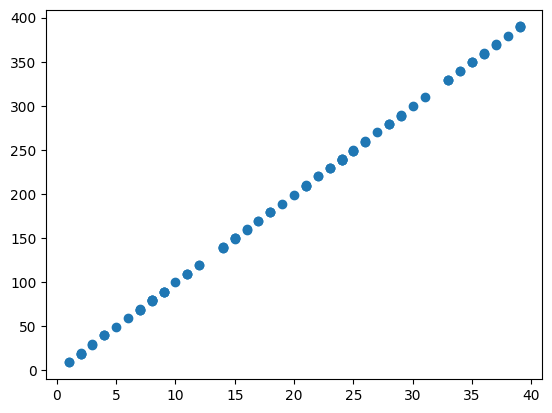

In [5]:
#visualization of datasets
plt.scatter(house_size,house_price)
plt.show()

In [6]:
#converting our independent and dependent variable into tensors
house_size_tensor=tf.constant(house_size,dtype=tf.float32)
house_price_tensor=tf.constant(house_price,dtype=tf.float32)

In [7]:
#set random seed
tf.random.set_seed(42)
#create the model using the sequential api
model=keras.Sequential()
model.add(keras.layers.Dense(1))

#compile the modle
model.compile(optimizer='sgd', loss='mae',metrics=['mae','accuracy','mse'])
model.fit(tf.expand_dims(house_size_tensor,axis=-1),house_price_tensor,epochs=5)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0000e+00 - loss: 215.8381 - mae: 215.8381 - mse: 61932.7344 
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 199.8651 - mae: 199.8651 - mse: 53121.8242
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 183.8922 - mae: 183.8922 - mse: 44986.8281
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 167.9193 - mae: 167.9193 - mse: 37527.7344 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 151.9464 - mae: 151.9464 - mse: 30744.5410


In [8]:
#lets test our models
model.predict(np.array([6.0]).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[17.50499]], dtype=float32)

In [9]:
#now improve our model by using extra layers and increasing the epochs and optimizers like batch gradient which is best for liner model
tf.random.set_seed(42)
model=keras.Sequential()
#create the model using sequential api
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1))
#compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.000001),loss='mse')
model.fit(tf.expand_dims(house_size_tensor,axis=-1),house_price_tensor,batch_size=len(house_price),epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step - loss: 52174.4688
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 52075.2305
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 51982.2344
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 51891.0156
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 51801.4883
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 51713.5742
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 51627.1641
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 51542.1836
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 51458.5547
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 51376.2109


In [10]:
#lets test our models
model.predict(np.array([6.0]).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[-0.86143446]], dtype=float32)

In [11]:
#let test another optimizer like sochastic gradient descent
tf.random.set_seed(42)
model=keras.Sequential()
#create the model using sequential api
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1))
#compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.000001),loss='mse')
model.fit(tf.expand_dims(house_size_tensor,axis=-1),house_price_tensor,batch_size=1,epochs=10)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39407.7383
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 158.1882
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4118
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4117
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4112
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4107
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4102
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4098
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4093
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4089


In [12]:
#lets test our models
model.predict(np.array([6.0]).reshape(-1, 1))
#here the model gives best accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[60.122337]], dtype=float32)

In [13]:
#let check another optimizer like mini_batch_sochastic gradient descent
tf.random.set_seed(42)
model=keras.Sequential()
#create the model using sequential api
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1))
#compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.000001),loss='mse')
model.fit(tf.expand_dims(house_size_tensor,axis=-1),house_price_tensor,batch_size=5,epochs=10)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 53134.4688
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50949.0117
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47405.0391 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41087.9375
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29772.8457 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14736.9141
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3744.0264
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 464.7200  
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.2458 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0912


In [14]:
#lets test our models
model.predict(np.array([6.0]).reshape(-1, 1))
#here this also model gives best accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[60.054592]], dtype=float32)

### let's check all time best optimizer like `Adam`(which performs well only in non_linear datasets)

In [15]:
tf.random.set_seed(42)
model=keras.Sequential()
#create the model using sequential api
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1))
#compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='mae')
model.fit(tf.expand_dims(house_size_tensor,axis=-1),house_price_tensor,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 198.1192
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 195.2566
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 192.8278
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 190.4935
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 188.1931
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 186.2572
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 184.1487
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 181.6846
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 178.8008
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 175.4229
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 171.4696
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 166.8509
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 161.4685 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 155.2160
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

In [16]:
#lets test our models
model.predict(np.array([6.0]).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[59.391457]], dtype=float32)

### here we can saw that loss is oscillating between 0 and 1 it means models is not conversing and model is unstable

### The reason behind this is:
* learning rate is too high
* poor data scaling
* bad initialization
* batch size too small
* optimizer mismatch

### Observation	Technical Term
* Loss oscillates or repeats	---->Non-convergent / Oscillating model
* Loss increases steadily----->	Divergent model
* Loss stays constant ------>	Plateau / Stalled training
* Loss decreases smoothly----->	Convergent model